## Análisis Exploratorio de Datos (EDA)

### 1. Chequeo de Valores Nulos y Faltantes
Aquí realizamos un chequeo de los valores nulos y faltantes en el dataset. ...

### 2. Valores Duplicados
Verificamos si existen filas duplicadas y las eliminamos si es necesario. ...

### 3. Tipos de Datos
Revisamos los tipos de datos de cada columna para asegurarnos de que son correctos. ...

### 4. Análisis Estadístico de Datos
Realizamos un análisis estadístico para obtener una visión general de los datos. ...

### 7. Gráficas Adicionales
Creamos gráficas para visualizar la distribución de variables numéricas y categóricas, así como una nube de palabras para los títulos de las películas. ...

In [ ]:
pip install pandas
pip install seaborn
pip install scikit-learn
pip install wordcloud

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
# Ruta a la carpeta donde están los archivos
df_genres_id = pd.read_csv('C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_genres_id.csv')
df_central = pd.read_csv('C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_central.csv')

# Mostrar las primeras filas de los DataFrames para verificar

print(df_genres_id.head())
print(df_central.head())


     id  id_genre      genre
0   862      16.0  Animation
1   862      35.0     Comedy
2   862   10751.0     Family
3  8844      12.0  Adventure
4  8844      14.0    Fantasy
     budget     id original_language  popularity release_date      revenue  \
0  30000000    862                en   21.946943   1995-10-30  373554033.0   
1  65000000   8844                en   17.015539   1995-12-15  262797249.0   
2         0  15602                en   11.712900   1995-12-22          0.0   
3  16000000  31357                en    3.859495   1995-12-22   81452156.0   
4         0  11862                en    8.387519   1995-02-10   76578911.0   

   runtime    status                        title  vote_average  vote_count  \
0     81.0  Released                    Toy Story           7.7      5415.0   
1    104.0  Released                      Jumanji           6.9      2413.0   
2    101.0  Released             Grumpier Old Men           6.5        92.0   
3    127.0  Released            Waiting t

In [18]:
def obtener_peliculas_completas():
    # Realiza la fusión de los DataFrames
    df_completa = df_genres_id.merge(df_central, on='id')
    
    # Agrupa los géneros por 'id' y los concatena en una sola cadena
    df_completa['genres'] = df_completa.groupby('id')['genre'].transform(lambda x: ' '.join(x))
    
    # Elimina duplicados basados en la columna 'id'
    df_completa = df_completa.drop_duplicates(subset=['id'])
    
    # Selecciona solo las columnas necesarias
    df_completa = df_completa[['id', 'title', 'genres']]
    
    return df_completa


In [34]:
# Convertir las columnas 'id' en df_genres_id y df_central, a tipo cadena para asegurar la consistencia durante la fusión con df_central.
df_genres_id['id'] = df_genres_id['id'].astype(str)
df_central['id'] = df_central['id'].astype(str)


In [35]:
df_completa = obtener_peliculas_completas()
print(df_completa.head())

       id                        title                    genres
0     862                    Toy Story   Animation Comedy Family
3    8844                      Jumanji  Adventure Fantasy Family
6   15602             Grumpier Old Men            Romance Comedy
8   31357            Waiting to Exhale      Comedy Drama Romance
11  11862  Father of the Bride Part II                    Comedy


In [21]:
df_completa

,id,title,genres
0,862,Toy Story,Animation Comedy Family
3,8844,Jumanji,Adventure Fantasy Family
6,15602,Grumpier Old Men,Romance Comedy
8,31357,Waiting to Exhale,Comedy Drama Romance
11,11862,Father of the Bride Part II,Comedy
...,...,...,...
90948,289923,The Burkittsville 7,Horror
90949,222848,Caged Heat 3000,Science Fiction
90950,30840,Robin Hood,Drama Action Romance
90953,111109,Century of Birthing,Drama


In [25]:
# Verificar si hay valores nulos en el DataFrame y calcular el porcentaje de valores faltantes

# Chequeo de nulos: Contar los valores nulos en cada columna
nulos = df_completa.isnull().sum()

# Calcular el porcentaje de valores faltantes en cada columna
porcentaje_nulos = (df_completa.isnull().sum() / len(df_completa)) * 100

# Mostrar los valores faltantes y el porcentaje de valores faltantes por columna
print("Valores faltantes por columna:\n", nulos)
print("Porcentaje de valores faltantes por columna:\n", porcentaje_nulos.round(2))

Valores faltantes por columna:
 id        0
title     0
genres    0
dtype: int64
Porcentaje de valores faltantes por columna:
 id        0.0
title     0.0
genres    0.0
dtype: float64


In [27]:
# Verificar valores duplicados: Contar el número de filas duplicadas en el DataFrame
duplicados = df_completa.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Eliminar duplicados si es necesario: Elimina todas las filas duplicadas del DataFrame
df_completa = df_completa.drop_duplicates()

Número de filas duplicadas: 0


In [28]:
# Chequear tipos de datos: Mostrar los tipos de datos de cada columna en el DataFrame
tipos_datos = df_completa.dtypes
print("Tipos de datos por columna:\n", tipos_datos)

Tipos de datos por columna:
 id        object
title     object
genres    object
dtype: object


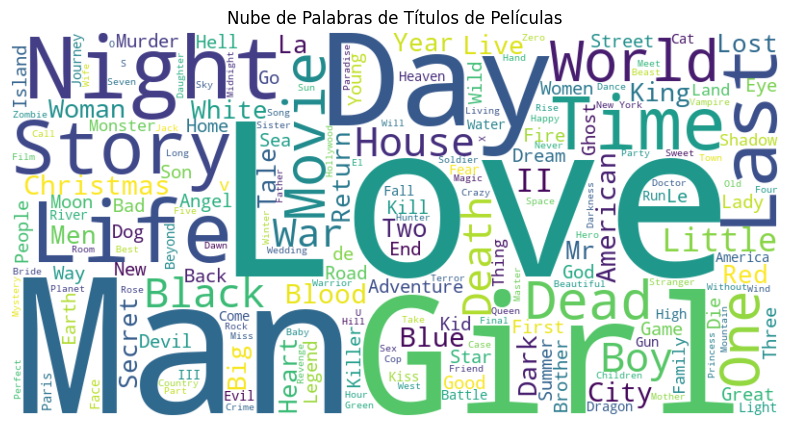

In [30]:
# Concatenar todos los títulos en una sola cadena
text = ' '.join(df_completa['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la imagen de la nube de palabras
plt.axis('off')  # Desactivar los ejes para una visualización limpia
plt.title('Nube de Palabras de Títulos de Películas')  # Título del gráfico
plt.show()  # Mostrar el gráfico

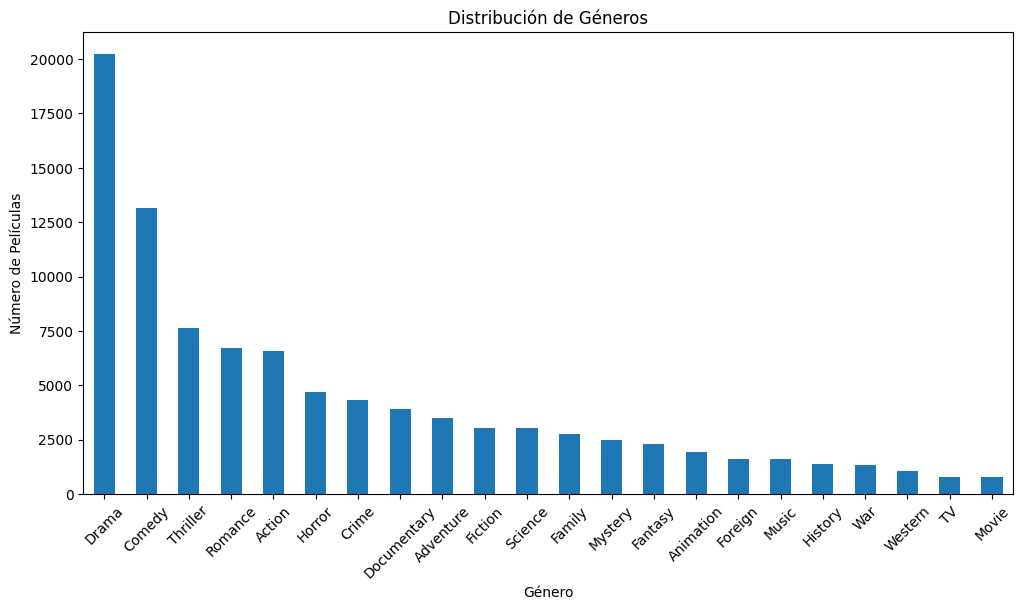

In [29]:
# Contar la frecuencia de cada género
# Une todos los géneros en una sola cadena, la divide en una lista de géneros y cuenta la frecuencia de cada uno
all_genres = ' '.join(df_completa['genres']).split()
genre_counts = pd.Series(all_genres).value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura
genre_counts.plot(kind='bar', color='skyblue')  # Crear gráfico de barras con color
plt.title('Distribución de Géneros')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Número de Películas')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar el corte de etiquetas
plt.show()  # Mostrar el gráfico

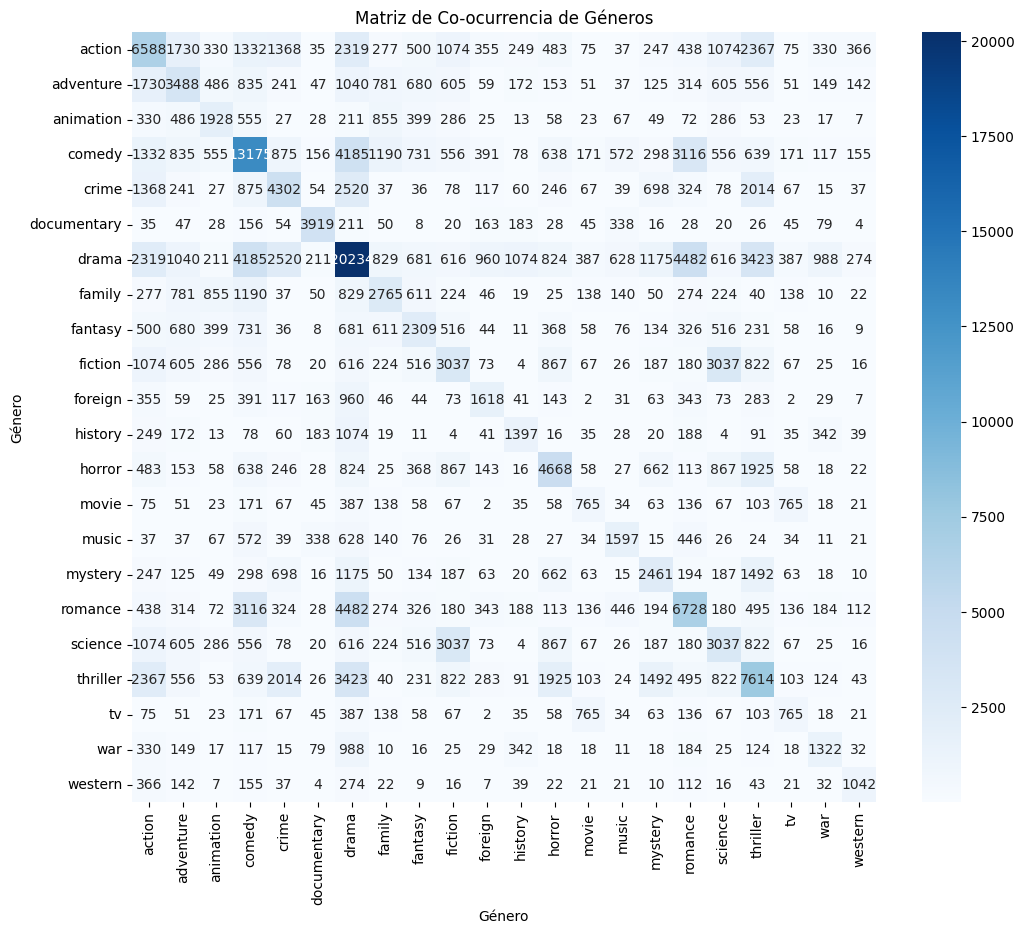

In [33]:
# Contar la frecuencia de cada género
all_genres = ' '.join(df_completa['genres']).split()
genre_counts = pd.Series(all_genres).value_counts()

# Filtrar géneros que aparecen en menos de 10 películas
filtered_genres = genre_counts[genre_counts >= 10].index

# Filtrar el DataFrame original para incluir solo los géneros relevantes
df_completa['filtered_genres'] = df_completa['genres'].apply(lambda x: ' '.join(g for g in x.split() if g in filtered_genres))

# Vectorizar los géneros filtrados
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_completa['filtered_genres'])

# Crear una matriz de co-ocurrencia: Multiplicar la matriz transpuesta por la matriz original
co_occur_matrix = (X.T * X).toarray()  # Convertir la matriz dispersa a una matriz densa usando toarray()
co_occur_df = pd.DataFrame(co_occur_matrix, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Mostrar el heatmap de co-ocurrencia de géneros
plt.figure(figsize=(12, 10))  # Establecer el tamaño de la figura
sns.heatmap(co_occur_df, cmap='Blues', annot=True, fmt='d')  # Crear el heatmap con anotaciones
plt.title('Matriz de Co-ocurrencia de Géneros')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Género')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico